### Create Model

In [99]:
# Read and prepare the final dataframe for the modelling

import pandas as pd

## Read the data
obs = pd.read_json("modeling_dat.json")
# obs.columns.to_list()
# obs.set_index("date", inplace=True)

## Set the columns datatypes
float_columns = ["flow", "Ecoli", "TN", "TP", "mndwi_median", "ndvi_median", "nirv_median", "nsmi_median",
                 "bsi_median", "evi_median", "savi_median", "ndmi_median", "ci_median", "lai_median", "air_temp",
                 "earth_temp", "rain", "soil_moist", "lat", "long", "elevation_median", "aspect_median",
                 "slope_median", "tri_median", "length_m", "dis_to_sea_m", "catchment_area_m", "dis_head_w"]
categorical_columns = ["geology", "src_of_flw", "strahler_order"]
string_columns = ["nz_segment", "nz_reach", "island", "region", ]

obs[float_columns] = obs[float_columns].astype("float")
obs[categorical_columns] = obs[categorical_columns].astype("category")
obs[string_columns] = obs[string_columns].astype("string")
obs

,nz_segment,nz_reach,date,flow,Ecoli,TN,TP,mndwi_median,ndvi_median,nirv_median,...,src_of_flw,elevation_median,aspect_median,slope_median,tri_median,length_m,strahler_order,dis_to_sea_m,catchment_area_m,dis_head_w
0,1002765,1002580,2019-01-17,0.5517,460.0,0.10,0.019,-0.4649,0.7774,2383.9481,...,L,111.365433,181.288025,10.593521,7.085887,779.11688,6,9348.154,156565856.0,35984.0
1,1002765,1002580,2019-02-12,0.2004,370.0,0.15,0.012,-0.4414,0.6855,2000.0816,...,L,111.365433,181.288025,10.593521,7.085887,779.11688,6,9348.154,156565856.0,35984.0
2,1002765,1002580,2019-04-03,1.5207,290.0,0.16,0.014,-0.5117,0.7773,1807.9543,...,L,111.365433,181.288025,10.593521,7.085887,779.11688,6,9348.154,156565856.0,35984.0
3,1002765,1002580,2019-05-01,0.2265,250.0,0.11,0.010,-0.5040,0.8008,1935.9269,...,L,111.365433,181.288025,10.593521,7.085887,779.11688,6,9348.154,156565856.0,35984.0
4,1002765,1002580,2019-06-05,2.5976,290.0,0.15,0.020,-0.5117,0.8164,1887.7176,...,L,111.365433,181.288025,10.593521,7.085887,779.11688,6,9348.154,156565856.0,35984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,15320438,15062815,2020-08-10,1.4850,60.0,1.84,0.086,-0.3477,0.8086,1504.0462,...,L,69.583496,198.370239,4.516188,3.020083,3701.90909,4,8425.950,72980104.0,23121.0
20506,15320438,15062815,2020-09-07,2.0740,170.0,1.85,0.077,-0.3008,0.7774,1631.7350,...,L,69.583496,198.370239,4.516188,3.020083,3701.90909,4,8425.950,72980104.0,23121.0
20507,15320438,15062815,2020-10-12,3.3928,190.0,2.10,0.106,-0.5195,0.8399,2991.9835,...,L,69.583496,198.370239,4.516188,3.020083,3701.90909,4,8425.950,72980104.0,23121.0
20508,15320438,15062815,2020-11-16,0.7874,14000.0,1.49,0.116,-0.5039,0.8868,4112.0382,...,L,69.583496,198.370239,4.516188,3.020083,3701.90909,4,8425.950,72980104.0,23121.0


In [100]:
import numpy as np
import pandas as pd
import gc

## Create a copy of the DataFrame
clean_df = obs.copy()

## Define the thresholds
thresholds = [0, 130, 260, 540, float('inf')]

# Define the labels for the ordinal levels
labels = ['Safe', 'Caution', 'Warning', 'Unsafe']

## Create the ordinal column based on the thresholds
clean_df.loc[:,'Ecoli_Levels'] = pd.cut(clean_df.loc[:,'Ecoli'], bins=thresholds, labels=labels, right=False)
clean_df.loc[:,'Ecoli_Levels'] = clean_df.loc[:, 'Ecoli_Levels'].astype('category')

## Create a binary column where 'Ecoli' is equal to "Level 1"
clean_df['Ecoli_Safe'] = np.where(clean_df.loc[:, 'Ecoli_Levels'] == "Safe", 1, 0)
clean_df['Ecoli_Caution'] = np.where(clean_df.loc[:, 'Ecoli_Levels'] == "Caution", 1, 0)
clean_df['Ecoli_Warning'] = np.where(clean_df.loc[:, 'Ecoli_Levels'] == "Warning", 1, 0)
clean_df['Ecoli_Unsafe'] = np.where(clean_df.loc[:, 'Ecoli_Levels'] == "Unsafe", 1, 0)

## This unseen data is different from the train / test data
train_obs = clean_df.sample (frac = 0.8, random_state = 786)
test_obs = clean_df.drop (train_obs.index)
train_obs.reset_index (drop=True, inplace=True)
test_obs.reset_index (drop=True, inplace=True)
print('Data for Modeling: ' + str(train_obs.shape))
print('Unseen Data For Predictions: ' + str(test_obs.shape))

## Get the total number of observations in each class
level_counts = train_obs['Ecoli_Levels'].value_counts()
print ('\nN observation in each class:')
print (level_counts)

## Set the target variable
train_obs['target'] = train_obs["Ecoli_Unsafe"]

## Group the DataFrame by the 'Ecoli_Level' column
grouped = train_obs.groupby('target')

## Calculate the minimum count for any level
min_count = grouped.size().min()

## Take a random sample of the minimum count from each group
sampled_obs = grouped.apply(lambda x: x.sample(n=min_count))
sampled_obs = sampled_obs.reset_index(drop=True)

train_obs = None
grouped = None
gc.collect()

# columns = ["Ecoli_Levels", "mndwi_median", "ndvi_median", "nirv_median", "nsmi_median", "bsi_median", "evi_median", savi_median", "ndmi_median", "ci_median",
           # "lai_median", "air_temp", "earth_temp", "rain", "soil_moist", "tri_median", "src_of_flw"]]
sampled_obs = sampled_obs[["target", "mndwi_median", "ndvi_median", "nirv_median", "lai_median", "air_temp", "earth_temp", "rain", "soil_moist", "tri_median"]]
print('\nNumber of sampled observations: ' + str(sampled_obs.shape))

Data for Modeling: (16408, 41)
Unseen Data For Predictions: (4102, 41)

N observation in each class:
Safe       8036
Unsafe     3229
Caution    2786
Warning    2357
Name: Ecoli_Levels, dtype: int64

Number of sampled observations: (6458, 5)


In [101]:
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

## set tracking uri 
import mlflow 
mlflow.set_tracking_uri("file:/D:/OneDrive/Work/Imaginative AI/Projects/Aqua-Anaytica Prepration/mlflow-server")
        
## setup a modelling practice
clas_exp.setup(
    ## *************** General details ***************
    data = sampled_obs, target = "Ecoli_Levels",
    session_id = 123, # A seed value to base the random process
    # log_experiment = False, # Logs the mlexperiment if set to True
    # experiment_name = "reg-default-name", # An identifier to track the experiment in the log file
    
    ## *************** Missing values ***************
    # numeric_imputation = "mean",
    # categorical_imputation = "constant",
    
    ## *************** Normalization and Transformation ***************
    normalize = True, # Normalizes features to eleminate the unite effect
    # normalize_method = "zscore",
    # transformation = True, # Transforms the features to a more normal distribution
    # fix_imbalance = True, # Deal with unequal distribution of target
    # transform_target = True, # Transforms the target to a more normal distribution
    # bin_numeric_features = ["column_name"], # Converts a continous feature to a categorical feature
                                 # It uses the ‘sturges’ rule to determine the number of bins
                                 # and K-Means clustering to convert continuous into categorical features
    # fix_imbalance = True, # Deals with imbalance target
    
    # *************** Ordinal Encoding ***************
    # ordinal_features = {'column' : ['low', 'medium', 'high']}
    
    ## *************** Feature selection ***************
    # ignore_features = ["#", "flow", "nsmi_median", "bsi_median", "evi_median",
    #                    "savi_median", "mndwi_median", "air_temp", "earth_temp",
    #                    "ndmi_median", "ci_median", "strahler_order", "geology", "src_of_flw"], # Ignor some columns in the modelling. It gets overwright when "feature_selection" is set True
    # feature_selection = True, # Selects the best feature for predicting the target value
    # n_features_to_select = 0.5, # Minimum number of features, for example top 50%
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    # pca = True, # Uses PCA to reduce the feature space
    # pca_components = 4, # The number of PCA to keep, here frst 10 components
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
                     # categorical data encoding) when preprocess is set to False.
    
    ## *************** Oveal Tunning ***************
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    use_gpu = False,
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

,Description,Value
0,Session id,123
1,Target,Ecoli_Levels
2,Target type,Multiclass
3,Original data shape,"(6458, 5)"
4,Transformed data shape,"(6458, 5)"
5,Transformed train set shape,"(4520, 5)"
6,Transformed test set shape,"(1938, 5)"
7,Numeric features,4


In [81]:
## Get all available estimators
clas_exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [112]:
best = clas_exp.compare_models(n_select = 1)
# best = clas_exp.create_model('lightgbm')

## Get the top n estimators
tunned_best = clas_exp.tune_model(best, fold=20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6084,0.7208,0.6084,0.5201,0.5437,0.3023,0.3223,0.4070
lightgbm,Light Gradient Boosting Machine,0.5918,0.7119,0.5918,0.5166,0.5401,0.2903,0.3017,0.3660
ada,Ada Boost Classifier,0.5867,0.6858,0.5867,0.4779,0.5195,0.2563,0.2780,0.0660
et,Extra Trees Classifier,0.5843,0.7010,0.5843,0.5188,0.5401,0.2832,0.2929,0.0950
ridge,Ridge Classifier,0.5825,0.0000,0.5825,0.4717,0.5135,0.2427,0.2677,0.0110
lr,Logistic Regression,0.5821,0.6860,0.5821,0.4713,0.5130,0.2420,0.2668,0.0760
nb,Naive Bayes,0.5819,0.6859,0.5819,0.4693,0.5153,0.2492,0.2691,0.0110
lda,Linear Discriminant Analysis,0.5819,0.6902,0.5819,0.4714,0.5120,0.2396,0.2658,0.0150
qda,Quadratic Discriminant Analysis,0.5816,0.6903,0.5816,0.4687,0.5162,0.2524,0.2703,0.0100
rf,Random Forest Classifier,0.5792,0.6981,0.5792,0.5096,0.5306,0.2708,0.2809,0.1680


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6150,0.7380,0.6150,0.5529,0.5715,0.3406,0.3499
1,0.5841,0.7393,0.5841,0.5212,0.5473,0.2984,0.3038
2,0.6416,0.7678,0.6416,0.5804,0.5882,0.3720,0.3904
3,0.6283,0.7606,0.6283,0.5974,0.5891,0.3636,0.3725
4,0.5796,0.7159,0.5796,0.5133,0.5360,0.2810,0.2879
5,0.6593,0.7474,0.6593,0.6151,0.6207,0.4169,0.4273
6,0.6460,0.7630,0.6460,0.5365,0.5853,0.3840,0.3992
7,0.5929,0.7160,0.5929,0.5108,0.5427,0.2943,0.3057
8,0.6106,0.7471,0.6106,0.5491,0.5682,0.3358,0.3440


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 20 folds for each of 10 candidates, totalling 200 fits


In [83]:
ensemble_tunned_best = clas_exp.ensemble_model(tunned_best, method = "Bagging")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5907,0.7114,0.5907,0.4797,0.5269,0.2730,0.2901
1,0.6239,0.7352,0.6239,0.5122,0.5590,0.3320,0.3531
2,0.6084,0.7200,0.6084,0.5476,0.5553,0.3156,0.3295
3,0.6150,0.7264,0.6150,0.5021,0.5472,0.3092,0.3335
4,0.6305,0.7370,0.6305,0.5839,0.5783,0.3512,0.3685
5,0.6350,0.7232,0.6350,0.5585,0.5793,0.3635,0.3780
6,0.5996,0.7219,0.5996,0.5494,0.5421,0.2956,0.3105
7,0.5929,0.6907,0.5929,0.5444,0.5400,0.2828,0.2982
8,0.6217,0.7165,0.6217,0.5291,0.5586,0.3291,0.3493


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

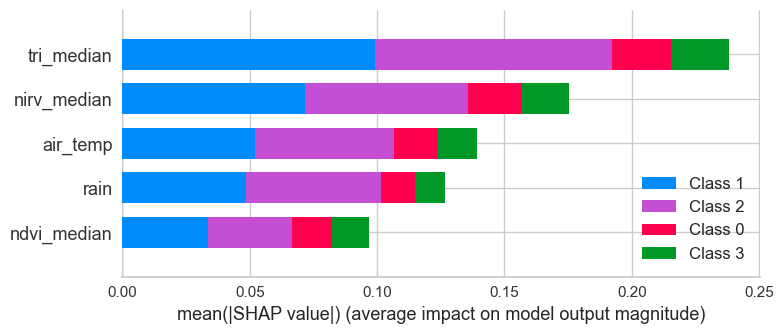

In [84]:
clas_exp.interpret_model(tunned_best)
# clas_exp.interpret_model(tunned_best, "correlation")
clas_exp.interpret_model(tunned_best, 'reason', observation = 10)

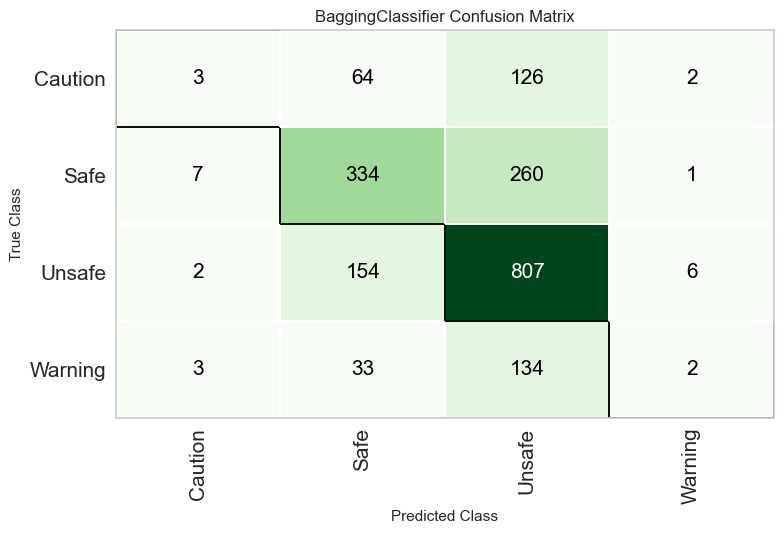

In [85]:
clas_exp.plot_model(ensemble_tunned_best, plot = 'confusion_matrix', display_labels='percent')
# clas_exp.interpret_model(best)

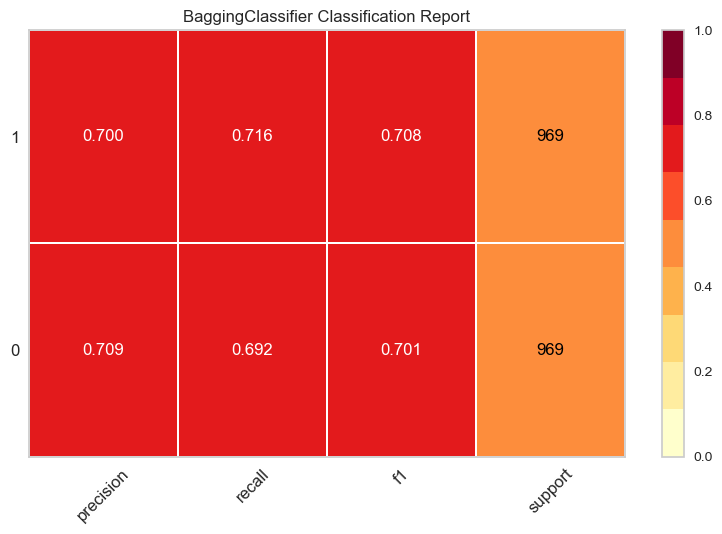

In [86]:
clas_exp.plot_model(ensemble_tunned_best, plot = 'class_report')

In [87]:
calibrated_ensemble_tunned_best = clas_exp.calibrate_model(ensemble_tunned_best)
optimised_calibrated_ensemble_tunned_best = clas_exp.calibrate_model(calibrated_ensemble_tunned_best)
final_model = clas_exp.finalize_model(optimised_calibrated_ensemble_tunned_best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7124,0.7743,0.7080,0.7143,0.7111,0.4248,0.4248
1,0.6460,0.7137,0.6814,0.6364,0.6581,0.2920,0.2928
2,0.7367,0.8017,0.7743,0.7202,0.7463,0.4735,0.4748
3,0.6571,0.7285,0.6903,0.6473,0.6681,0.3142,0.3149
4,0.6903,0.7636,0.7301,0.6762,0.7021,0.3805,0.3817
5,0.6814,0.7619,0.6947,0.6767,0.6856,0.3628,0.3630
6,0.6814,0.7459,0.6858,0.6798,0.6828,0.3628,0.3628
7,0.6969,0.7699,0.7566,0.6759,0.7140,0.3938,0.3966
8,0.6881,0.7411,0.6991,0.6840,0.6915,0.3761,0.3762


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7124,0.7756,0.7035,0.7162,0.7098,0.4248,0.4248
1,0.6460,0.7125,0.6681,0.6398,0.6537,0.2920,0.2923
2,0.7389,0.8006,0.7788,0.7213,0.7489,0.4779,0.4794
3,0.6549,0.7301,0.6903,0.6446,0.6667,0.3097,0.3105
4,0.6991,0.7648,0.7345,0.6860,0.7094,0.3982,0.3992
5,0.6858,0.7611,0.6947,0.6826,0.6886,0.3717,0.3717
6,0.6881,0.7472,0.6947,0.6856,0.6901,0.3761,0.3761
7,0.6991,0.7680,0.7522,0.6800,0.7143,0.3982,0.4005
8,0.6748,0.7420,0.6726,0.6756,0.6741,0.3496,0.3496


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [99]:
# ## predict on test set
# holdout_pred = clas_exp.predict_model(final_model, data=test_obs, verbose = False)
# holdout_pred

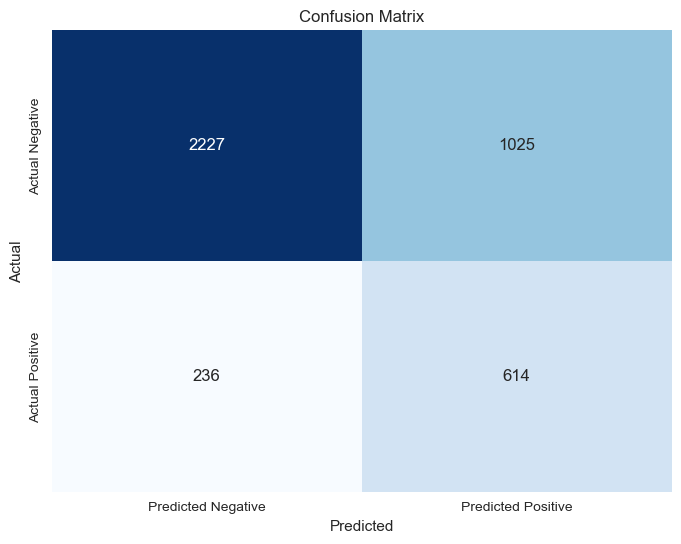

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(holdout_pred["Ecoli_Unsafe"], holdout_pred["prediction_label"])
cm

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [90]:
## Save the model
clas_exp.save_model(
    final_model, 
    model_name = "Final_LightGBM_Ecoli_L4", 
    model_only = False
)

## Load the model
ecoli_l1_lightgbm_model = clas_exp.load_model(model_name = "Final_LightGBM_Ecoli_L4",
                                              verbose = True
)

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [36]:
clas_exp.evaluate_model(ecoli_l1_lightgbm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Implement Models

In [97]:
# Read and prepare the final dataframe for the modelling

import pandas as pd

## Read the data
obs = pd.read_json("modeling_dat.json")
## Set the columns datatypes
float_columns = ["flow", "Ecoli", "TN", "TP", "mndwi_median", "ndvi_median", "nirv_median", "nsmi_median",
                 "bsi_median", "evi_median", "savi_median", "ndmi_median", "ci_median", "lai_median", "air_temp",
                 "earth_temp", "rain", "soil_moist", "lat", "long", "elevation_median", "aspect_median",
                 "slope_median", "tri_median", "length_m", "dis_to_sea_m", "catchment_area_m", "dis_head_w"]
categorical_columns = ["geology", "src_of_flw", "strahler_order"]
string_columns = ["nz_segment", "nz_reach", "island", "region", ]

obs[float_columns] = obs[float_columns].astype("float")
obs[categorical_columns] = obs[categorical_columns].astype("category")
obs[string_columns] = obs[string_columns].astype("string")

## Define the thresholds
thresholds = [0, 130, 260, 540, float('inf')]

# Define the labels for the ordinal levels
labels = ['Safe', 'Caution', 'Warning', 'Unsafe']

## Create the ordinal column based on the thresholds
obs.loc[:,'Ecoli_Levels'] = pd.cut(obs.loc[:,'Ecoli'], bins=thresholds, labels=labels, right=False)
obs.loc[:,'Ecoli_Levels'] = obs.loc[:, 'Ecoli_Levels'].astype('category')

## Create a binary column where 'Ecoli' is equal to "Level 1"
obs['Ecoli_Safe'] = np.where(obs.loc[:, 'Ecoli_Levels'] == "Safe", 1, 0)
obs['Ecoli_Caution'] = np.where(obs.loc[:, 'Ecoli_Levels'] == "Caution", 1, 0)
obs['Ecoli_Warning'] = np.where(obs.loc[:, 'Ecoli_Levels'] == "Warning", 1, 0)
obs['Ecoli_Unsafe'] = np.where(obs.loc[:, 'Ecoli_Levels'] == "Unsafe", 1, 0)

Data for Modeling: (16408, 41)
Unseen Data For Predictions: (4102, 41)

N observation in each class:
Safe       8036
Unsafe     3229
Caution    2786
Warning    2357
Name: Ecoli_Levels, dtype: int64


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(16072, 10)"
4,Transformed data shape,"(16072, 10)"
5,Transformed train set shape,"(11250, 10)"
6,Transformed test set shape,"(4822, 10)"
7,Numeric features,9


Transformation Pipeline and Model Successfully Loaded


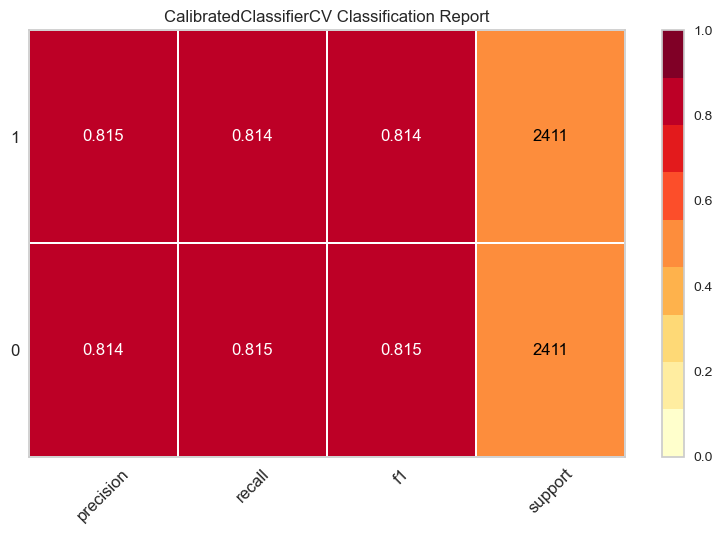

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

## Create a copy of the DataFrame
clean_df = obs.copy()

## This unseen data is different from the train / test data
train_obs = clean_df.sample (frac = 0.8, random_state = 786)
test_obs = clean_df.drop (train_obs.index)
train_obs.reset_index (drop=True, inplace=True)
test_obs.reset_index (drop=True, inplace=True)
print('Data for Modeling: ' + str(train_obs.shape))
print('Unseen Data For Predictions: ' + str(test_obs.shape))

## Get the total number of observations in each class
level_counts = train_obs['Ecoli_Levels'].value_counts()
print ('\nN observation in each class:')
print (level_counts)

## Set the target variable
train_obs['target'] = train_obs["Ecoli_Safe"]

## Group the DataFrame by the 'Ecoli_Level' column
grouped = train_obs.groupby('target')

## Calculate the minimum count for any level
min_count = grouped.size().min()

## Take a random sample of the minimum count from each group
sampled_obs = grouped.apply(lambda x: x.sample(n=min_count))
sampled_obs = sampled_obs.reset_index(drop=True)

train_obs = None
grouped = None
gc.collect()

sampled_obs = sampled_obs[["target", "mndwi_median", "ndvi_median", "nirv_median", "lai_median", "air_temp", "earth_temp", "rain", "soil_moist", "tri_median"]]
       
## setup a modelling practice
clas_exp.setup(
    data = sampled_obs, target = "target",
    session_id = 123, # A seed value to base the random process
    normalize = True, # Normalizes features to eleminate the unite effect
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    use_gpu = False,
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Load and evaluate the model
ecoli_l1_lightgbm_model = clas_exp.load_model(model_name = "Final_LightGBM_Ecoli_L1",  verbose = True)
clas_exp.plot_model(ecoli_l1_lightgbm_model, plot = 'class_report')

In [63]:
%%capture

## Predict on test set
pred_level_1 = clas_exp.predict_model(ecoli_l1_lightgbm_model, raw_score = True, data=clean_df, verbose = False);

In [64]:
## Rename the columns
pred_level_1 = pred_level_1.rename(
    columns={
        "prediction_label": "safe_pred",
        "prediction_score_0": "safe_pred_score_0",
        "prediction_score_1": "safe_pred_score_1"
    }
)

## Multiply 
pred_level_1["safe_pred_score_rec_0"] = pred_level_1["safe_pred_score_0"] * 0.815
pred_level_1["safe_pred_score_rec_1"] = pred_level_1["safe_pred_score_1"] * 0.814
pred_level_1

,nz_segment,nz_reach,date,flow,Ecoli,TN,TP,mndwi_median,ndvi_median,nirv_median,...,Ecoli_Levels,Ecoli_Safe,Ecoli_Caution,Ecoli_Warning,Ecoli_Unsafe,safe_pred,safe_pred_score_0,safe_pred_score_1,safe_pred_score_rec_0,safe_pred_score_rec_1
0,1002765,1002580,2019-01-17,0.5517,460.0,0.10,0.019,-0.4649,0.7774,2383.947998,...,Warning,0,0,1,0,0,0.6634,0.3366,0.540671,0.273992
1,1002765,1002580,2019-02-12,0.2004,370.0,0.15,0.012,-0.4414,0.6855,2000.081543,...,Warning,0,0,1,0,0,0.6626,0.3374,0.540019,0.274644
2,1002765,1002580,2019-04-03,1.5207,290.0,0.16,0.014,-0.5117,0.7773,1807.954346,...,Warning,0,0,1,0,0,0.8024,0.1976,0.653956,0.160846
3,1002765,1002580,2019-05-01,0.2265,250.0,0.11,0.010,-0.5040,0.8008,1935.926880,...,Caution,0,1,0,0,0,0.8094,0.1906,0.659661,0.155148
4,1002765,1002580,2019-06-05,2.5976,290.0,0.15,0.020,-0.5117,0.8164,1887.717651,...,Warning,0,0,1,0,1,0.4058,0.5942,0.330727,0.483679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,15320438,15062815,2020-08-10,1.4850,60.0,1.84,0.086,-0.3477,0.8086,1504.046143,...,Safe,1,0,0,0,1,0.3068,0.6932,0.250042,0.564265
20506,15320438,15062815,2020-09-07,2.0740,170.0,1.85,0.077,-0.3008,0.7774,1631.734985,...,Caution,0,1,0,0,1,0.4393,0.5607,0.358030,0.456410
20507,15320438,15062815,2020-10-12,3.3928,190.0,2.10,0.106,-0.5195,0.8399,2991.983398,...,Caution,0,1,0,0,0,0.7908,0.2092,0.644502,0.170289
20508,15320438,15062815,2020-11-16,0.7874,14000.0,1.49,0.116,-0.5039,0.8868,4112.038086,...,Unsafe,0,0,0,1,0,0.8580,0.1420,0.699270,0.115588


Data for Modeling: (16408, 41)
Unseen Data For Predictions: (4102, 41)

N observation in each class:
Safe       8036
Unsafe     3229
Caution    2786
Warning    2357
Name: Ecoli_Levels, dtype: int64


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(5572, 10)"
4,Transformed data shape,"(5572, 10)"
5,Transformed train set shape,"(3900, 10)"
6,Transformed test set shape,"(1672, 10)"
7,Numeric features,9


Transformation Pipeline and Model Successfully Loaded


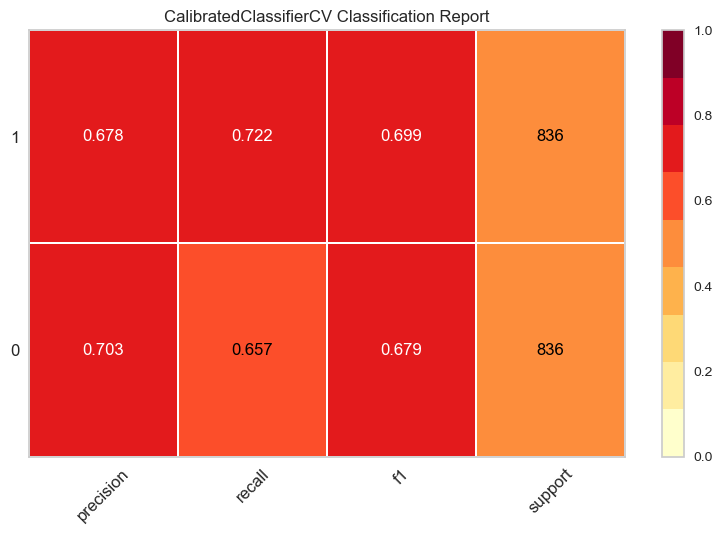

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

## Create a copy of the DataFrame
clean_df = obs.copy()

## This unseen data is different from the train / test data
train_obs = clean_df.sample (frac = 0.8, random_state = 786)
test_obs = clean_df.drop (train_obs.index)
train_obs.reset_index (drop=True, inplace=True)
test_obs.reset_index (drop=True, inplace=True)
print('Data for Modeling: ' + str(train_obs.shape))
print('Unseen Data For Predictions: ' + str(test_obs.shape))

## Get the total number of observations in each class
level_counts = train_obs['Ecoli_Levels'].value_counts()
print ('\nN observation in each class:')
print (level_counts)

## Set the target variable
train_obs['target'] = train_obs["Ecoli_Caution"]

## Group the DataFrame by the 'Ecoli_Level' column
grouped = train_obs.groupby('target')

## Calculate the minimum count for any level
min_count = grouped.size().min()

## Take a random sample of the minimum count from each group
sampled_obs = grouped.apply(lambda x: x.sample(n=min_count))
sampled_obs = sampled_obs.reset_index(drop=True)

train_obs = None
grouped = None
gc.collect()

sampled_obs = sampled_obs[["target", "mndwi_median", "ndvi_median", "nirv_median", "lai_median", "air_temp", "earth_temp", "rain", "soil_moist", "tri_median"]]
       
## setup a modelling practice
clas_exp.setup(
    data = sampled_obs, target = "target",
    session_id = 123, # A seed value to base the random process
    normalize = True, # Normalizes features to eleminate the unite effect
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    use_gpu = False,
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Load and evaluate the model
ecoli_l2_lightgbm_model = clas_exp.load_model(model_name = "Final_LightGBM_Ecoli_L2",  verbose = True)
clas_exp.plot_model(ecoli_l2_lightgbm_model, plot = 'class_report')

In [66]:
%%capture

## Predict on test set
pred_level_2 = clas_exp.predict_model(ecoli_l2_lightgbm_model, raw_score = True, data=pred_level_1, verbose = False);

In [67]:
## Rename the columns
pred_level_2 = pred_level_2.rename(
    columns={
        "prediction_label": "caution_pred",
        "prediction_score_0": "caution_pred_score_0",
        "prediction_score_1": "caution_pred_score_1"
    }
)

## Multiply 
pred_level_2["caution_pred_score_rec_0"] = pred_level_2["caution_pred_score_0"] * 0.657
pred_level_2["caution_pred_score_rec_1"] = pred_level_2["caution_pred_score_1"] * 0.722
pred_level_2

,nz_segment,nz_reach,date,flow,Ecoli,TN,TP,mndwi_median,ndvi_median,nirv_median,...,safe_pred,safe_pred_score_0,safe_pred_score_1,safe_pred_score_rec_0,safe_pred_score_rec_1,caution_pred,caution_pred_score_0,caution_pred_score_1,caution_pred_score_rec_0,caution_pred_score_rec_1
0,1002765,1002580,2019-01-17,0.5517,460.0,0.10,0.019,-0.4649,0.7774,2383.947998,...,0,0.6634,0.3366,0.540671,0.273992,1,0.4891,0.5109,0.321339,0.368870
1,1002765,1002580,2019-02-12,0.2004,370.0,0.15,0.012,-0.4414,0.6855,2000.081543,...,0,0.6626,0.3374,0.540019,0.274644,1,0.3731,0.6269,0.245127,0.452622
2,1002765,1002580,2019-04-03,1.5207,290.0,0.16,0.014,-0.5117,0.7773,1807.954346,...,0,0.8024,0.1976,0.653956,0.160846,1,0.4519,0.5481,0.296898,0.395728
3,1002765,1002580,2019-05-01,0.2265,250.0,0.11,0.010,-0.5040,0.8008,1935.926880,...,0,0.8094,0.1906,0.659661,0.155148,1,0.3968,0.6032,0.260698,0.435510
4,1002765,1002580,2019-06-05,2.5976,290.0,0.15,0.020,-0.5117,0.8164,1887.717651,...,1,0.4058,0.5942,0.330727,0.483679,0,0.5315,0.4685,0.349195,0.338257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,15320438,15062815,2020-08-10,1.4850,60.0,1.84,0.086,-0.3477,0.8086,1504.046143,...,1,0.3068,0.6932,0.250042,0.564265,1,0.4914,0.5086,0.322850,0.367209
20506,15320438,15062815,2020-09-07,2.0740,170.0,1.85,0.077,-0.3008,0.7774,1631.734985,...,1,0.4393,0.5607,0.358030,0.456410,0,0.5100,0.4900,0.335070,0.353780
20507,15320438,15062815,2020-10-12,3.3928,190.0,2.10,0.106,-0.5195,0.8399,2991.983398,...,0,0.7908,0.2092,0.644502,0.170289,1,0.4033,0.5967,0.264968,0.430817
20508,15320438,15062815,2020-11-16,0.7874,14000.0,1.49,0.116,-0.5039,0.8868,4112.038086,...,0,0.8580,0.1420,0.699270,0.115588,0,0.6070,0.3930,0.398799,0.283746


Data for Modeling: (16408, 41)
Unseen Data For Predictions: (4102, 41)

N observation in each class:
Safe       8036
Unsafe     3229
Caution    2786
Warning    2357
Name: Ecoli_Levels, dtype: int64


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(4714, 10)"
4,Transformed data shape,"(4714, 10)"
5,Transformed train set shape,"(3299, 10)"
6,Transformed test set shape,"(1415, 10)"
7,Numeric features,9


Transformation Pipeline and Model Successfully Loaded


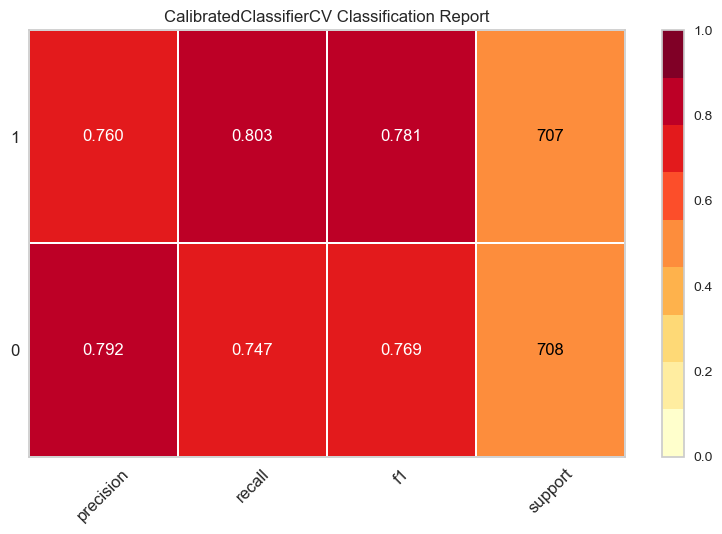

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

## Create a copy of the DataFrame
clean_df = obs.copy()

## This unseen data is different from the train / test data
train_obs = clean_df.sample (frac = 0.8, random_state = 786)
test_obs = clean_df.drop (train_obs.index)
train_obs.reset_index (drop=True, inplace=True)
test_obs.reset_index (drop=True, inplace=True)
print('Data for Modeling: ' + str(train_obs.shape))
print('Unseen Data For Predictions: ' + str(test_obs.shape))

## Get the total number of observations in each class
level_counts = train_obs['Ecoli_Levels'].value_counts()
print ('\nN observation in each class:')
print (level_counts)

## Set the target variable
train_obs['target'] = train_obs["Ecoli_Warning"]

## Group the DataFrame by the 'Ecoli_Level' column
grouped = train_obs.groupby('target')

## Calculate the minimum count for any level
min_count = grouped.size().min()

## Take a random sample of the minimum count from each group
sampled_obs = grouped.apply(lambda x: x.sample(n=min_count))
sampled_obs = sampled_obs.reset_index(drop=True)

train_obs = None
grouped = None
gc.collect()

sampled_obs = sampled_obs[["target", "mndwi_median", "ndvi_median", "nirv_median", "lai_median", "air_temp", "earth_temp", "rain", "soil_moist", "tri_median"]]
       
## setup a modelling practice
clas_exp.setup(
    data = sampled_obs, target = "target",
    session_id = 123, # A seed value to base the random process
    normalize = True, # Normalizes features to eleminate the unite effect
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    use_gpu = False,
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Load and evaluate the model
ecoli_l3_lightgbm_model = clas_exp.load_model(model_name = "Final_LightGBM_Ecoli_L3",  verbose = True)
clas_exp.plot_model(ecoli_l3_lightgbm_model, plot = 'class_report')

In [69]:
%%capture

## Predict on test set
pred_level_3 = clas_exp.predict_model(ecoli_l3_lightgbm_model, raw_score = True, data=pred_level_2, verbose = False);

In [70]:
## Rename the columns
pred_level_3 = pred_level_3.rename(
    columns={
        "prediction_label": "warning_pred",
        "prediction_score_0": "warning_pred_score_0",
        "prediction_score_1": "warning_pred_score_1"
    }
)

## Multiply 
pred_level_3["warning_pred_score_rec_0"] = pred_level_3["warning_pred_score_0"] * 0.747
pred_level_3["warning_pred_score_rec_1"] = pred_level_3["warning_pred_score_1"] * 0.803
pred_level_3

,nz_segment,nz_reach,date,flow,Ecoli,TN,TP,mndwi_median,ndvi_median,nirv_median,...,caution_pred,caution_pred_score_0,caution_pred_score_1,caution_pred_score_rec_0,caution_pred_score_rec_1,warning_pred,warning_pred_score_0,warning_pred_score_1,warning_pred_score_rec_0,warning_pred_score_rec_1
0,1002765,1002580,2019-01-17,0.5517,460.0,0.10,0.019,-0.4649,0.7774,2383.947998,...,1,0.4891,0.5109,0.321339,0.368870,1,0.4324,0.5676,0.323003,0.455783
1,1002765,1002580,2019-02-12,0.2004,370.0,0.15,0.012,-0.4414,0.6855,2000.081543,...,1,0.3731,0.6269,0.245127,0.452622,0,0.5213,0.4787,0.389411,0.384396
2,1002765,1002580,2019-04-03,1.5207,290.0,0.16,0.014,-0.5117,0.7773,1807.954346,...,1,0.4519,0.5481,0.296898,0.395728,1,0.3060,0.6940,0.228582,0.557282
3,1002765,1002580,2019-05-01,0.2265,250.0,0.11,0.010,-0.5040,0.8008,1935.926880,...,1,0.3968,0.6032,0.260698,0.435510,1,0.4041,0.5959,0.301863,0.478508
4,1002765,1002580,2019-06-05,2.5976,290.0,0.15,0.020,-0.5117,0.8164,1887.717651,...,0,0.5315,0.4685,0.349196,0.338257,1,0.4912,0.5088,0.366926,0.408566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,15320438,15062815,2020-08-10,1.4850,60.0,1.84,0.086,-0.3477,0.8086,1504.046143,...,1,0.4914,0.5086,0.322850,0.367209,0,0.6329,0.3671,0.472776,0.294781
20506,15320438,15062815,2020-09-07,2.0740,170.0,1.85,0.077,-0.3008,0.7774,1631.734985,...,0,0.5100,0.4900,0.335070,0.353780,0,0.5504,0.4496,0.411149,0.361029
20507,15320438,15062815,2020-10-12,3.3928,190.0,2.10,0.106,-0.5195,0.8399,2991.983398,...,1,0.4033,0.5967,0.264968,0.430817,1,0.2805,0.7195,0.209534,0.577759
20508,15320438,15062815,2020-11-16,0.7874,14000.0,1.49,0.116,-0.5039,0.8868,4112.038086,...,0,0.6070,0.3930,0.398799,0.283746,1,0.2819,0.7181,0.210579,0.576634


Data for Modeling: (16408, 41)
Unseen Data For Predictions: (4102, 41)

N observation in each class:
Safe       8036
Unsafe     3229
Caution    2786
Warning    2357
Name: Ecoli_Levels, dtype: int64


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(6458, 10)"
4,Transformed data shape,"(6458, 10)"
5,Transformed train set shape,"(4520, 10)"
6,Transformed test set shape,"(1938, 10)"
7,Numeric features,9


Transformation Pipeline and Model Successfully Loaded


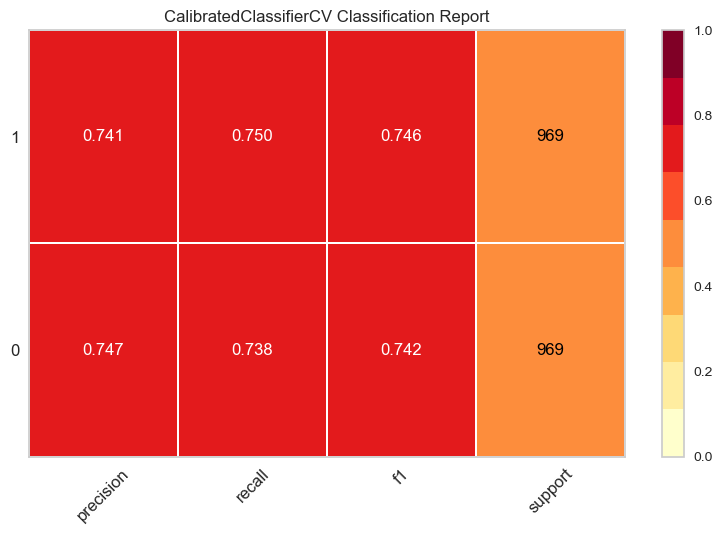

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import ClassificationExperiment
clas_exp = ClassificationExperiment()

## Create a copy of the DataFrame
clean_df = obs.copy()

## This unseen data is different from the train / test data
train_obs = clean_df.sample (frac = 0.8, random_state = 786)
test_obs = clean_df.drop (train_obs.index)
train_obs.reset_index (drop=True, inplace=True)
test_obs.reset_index (drop=True, inplace=True)
print('Data for Modeling: ' + str(train_obs.shape))
print('Unseen Data For Predictions: ' + str(test_obs.shape))

## Get the total number of observations in each class
level_counts = train_obs['Ecoli_Levels'].value_counts()
print ('\nN observation in each class:')
print (level_counts)

## Set the target variable
train_obs['target'] = train_obs["Ecoli_Unsafe"]

## Group the DataFrame by the 'Ecoli_Level' column
grouped = train_obs.groupby('target')

## Calculate the minimum count for any level
min_count = grouped.size().min()

## Take a random sample of the minimum count from each group
sampled_obs = grouped.apply(lambda x: x.sample(n=min_count))
sampled_obs = sampled_obs.reset_index(drop=True)

train_obs = None
grouped = None
gc.collect()

sampled_obs = sampled_obs[["target", "mndwi_median", "ndvi_median", "nirv_median", "lai_median", "air_temp", "earth_temp", "rain", "soil_moist", "tri_median"]]
       
## setup a modelling practice
clas_exp.setup(
    data = sampled_obs, target = "target",
    session_id = 123, # A seed value to base the random process
    normalize = True, # Normalizes features to eleminate the unite effect
    remove_multicollinearity = True, # Drops one feature in case of highcolinearity with another feature
    preprocess = False, # Data must be ready for modeling (no missing values, no dates,
    n_jobs = -1, # Parallel processing (default = -1, all resources)
    use_gpu = False,
    verbose = True, # To stop printing the information grid
    profile = False, # When set to True, an interactive EDA report is displayed
)

## Load and evaluate the model
ecoli_l4_lightgbm_model = clas_exp.load_model(model_name = "Final_LightGBM_Ecoli_L4",  verbose = True)
clas_exp.plot_model(ecoli_l4_lightgbm_model, plot = 'class_report')

In [74]:
%%capture

## Predict on test set
pred_level_4 = clas_exp.predict_model(ecoli_l4_lightgbm_model, raw_score = True, data=pred_level_3, verbose = False);

In [75]:
pred_level_4

,nz_segment,nz_reach,date,flow,Ecoli,TN,TP,mndwi_median,ndvi_median,nirv_median,...,caution_pred_score_rec_0,caution_pred_score_rec_1,warning_pred,warning_pred_score_0,warning_pred_score_1,warning_pred_score_rec_0,warning_pred_score_rec_1,prediction_label,prediction_score_0,prediction_score_1
0,1002765,1002580,2019-01-17,0.5517,460.0,0.10,0.019,-0.4649,0.7774,2383.947998,...,0.321339,0.368870,1,0.4324,0.5676,0.323003,0.455783,0,0.6616,0.3384
1,1002765,1002580,2019-02-12,0.2004,370.0,0.15,0.012,-0.4414,0.6855,2000.081543,...,0.245127,0.452622,0,0.5213,0.4787,0.389411,0.384396,0,0.7176,0.2824
2,1002765,1002580,2019-04-03,1.5207,290.0,0.16,0.014,-0.5117,0.7773,1807.954346,...,0.296898,0.395728,1,0.3060,0.6940,0.228582,0.557282,1,0.2983,0.7017
3,1002765,1002580,2019-05-01,0.2265,250.0,0.11,0.010,-0.5040,0.8008,1935.926880,...,0.260698,0.435510,1,0.4041,0.5959,0.301863,0.478508,1,0.4878,0.5122
4,1002765,1002580,2019-06-05,2.5976,290.0,0.15,0.020,-0.5117,0.8164,1887.717651,...,0.349196,0.338257,1,0.4912,0.5088,0.366926,0.408566,0,0.7704,0.2296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,15320438,15062815,2020-08-10,1.4850,60.0,1.84,0.086,-0.3477,0.8086,1504.046143,...,0.322850,0.367209,0,0.6329,0.3671,0.472776,0.294781,0,0.6509,0.3491
20506,15320438,15062815,2020-09-07,2.0740,170.0,1.85,0.077,-0.3008,0.7774,1631.734985,...,0.335070,0.353780,0,0.5504,0.4496,0.411149,0.361029,0,0.6303,0.3697
20507,15320438,15062815,2020-10-12,3.3928,190.0,2.10,0.106,-0.5195,0.8399,2991.983398,...,0.264968,0.430817,1,0.2805,0.7195,0.209533,0.577758,1,0.4924,0.5076
20508,15320438,15062815,2020-11-16,0.7874,14000.0,1.49,0.116,-0.5039,0.8868,4112.038086,...,0.398799,0.283746,1,0.2819,0.7181,0.210579,0.576634,1,0.2016,0.7984


In [78]:
## Rename the columns
pred_level_4 = pred_level_4.rename(
    columns={
        "prediction_label": "unsafe_pred",
        "prediction_score_0": "unsafe_pred_score_0",
        "prediction_score_1": "unsafe_pred_score_1"
    }
)

## Multiply 
pred_level_4["unsafe_pred_score_rec_0"] = pred_level_4["unsafe_pred_score_0"] * 0.738
pred_level_4["unsafe_pred_score_rec_1"] = pred_level_4["unsafe_pred_score_1"] * 0.75
pred_level_4

,nz_segment,nz_reach,date,flow,Ecoli,TN,TP,mndwi_median,ndvi_median,nirv_median,...,warning_pred,warning_pred_score_0,warning_pred_score_1,warning_pred_score_rec_0,warning_pred_score_rec_1,unsafe_pred,unsafe_pred_score_0,unsafe_pred_score_1,unsafe_pred_score_rec_0,unsafe_pred_score_rec_1
0,1002765,1002580,2019-01-17,0.5517,460.0,0.10,0.019,-0.4649,0.7774,2383.947998,...,1,0.4324,0.5676,0.323003,0.455783,0,0.6616,0.3384,0.488261,0.253800
1,1002765,1002580,2019-02-12,0.2004,370.0,0.15,0.012,-0.4414,0.6855,2000.081543,...,0,0.5213,0.4787,0.389411,0.384396,0,0.7176,0.2824,0.529589,0.211800
2,1002765,1002580,2019-04-03,1.5207,290.0,0.16,0.014,-0.5117,0.7773,1807.954346,...,1,0.3060,0.6940,0.228582,0.557282,1,0.2983,0.7017,0.220145,0.526275
3,1002765,1002580,2019-05-01,0.2265,250.0,0.11,0.010,-0.5040,0.8008,1935.926880,...,1,0.4041,0.5959,0.301863,0.478508,1,0.4878,0.5122,0.359996,0.384150
4,1002765,1002580,2019-06-05,2.5976,290.0,0.15,0.020,-0.5117,0.8164,1887.717651,...,1,0.4912,0.5088,0.366926,0.408566,0,0.7704,0.2296,0.568555,0.172200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,15320438,15062815,2020-08-10,1.4850,60.0,1.84,0.086,-0.3477,0.8086,1504.046143,...,0,0.6329,0.3671,0.472776,0.294781,0,0.6509,0.3491,0.480364,0.261825
20506,15320438,15062815,2020-09-07,2.0740,170.0,1.85,0.077,-0.3008,0.7774,1631.734985,...,0,0.5504,0.4496,0.411149,0.361029,0,0.6303,0.3697,0.465161,0.277275
20507,15320438,15062815,2020-10-12,3.3928,190.0,2.10,0.106,-0.5195,0.8399,2991.983398,...,1,0.2805,0.7195,0.209533,0.577758,1,0.4924,0.5076,0.363391,0.380700
20508,15320438,15062815,2020-11-16,0.7874,14000.0,1.49,0.116,-0.5039,0.8868,4112.038086,...,1,0.2819,0.7181,0.210579,0.576634,1,0.2016,0.7984,0.148781,0.598800


In [88]:
res = pred_level_4.copy()

res["pred"] = res["safe_pred"] + res['caution_pred'] + res['warning_pred'] + res['unsafe_pred']

# res["pred_e"] = np.where((res["pred"] == 1) & (res['safe_pred'] == 1) & (res['caution_pred'] == 0) & (res['warning_pred'] == 0) & (res['unsafe_pred'] == 0), "Safe", "")
# res["pred_e"] = np.where((res["pred"] == 1) & (res['safe_pred'] == 0) & (res['caution_pred'] == 1) & (res['warning_pred'] == 0) & (res['unsafe_pred'] == 0), "Caution", "")
# res["pred_e"] = np.where((res["pred"] == 1) & (res['safe_pred'] == 0) & (res['caution_pred'] == 0) & (res['warning_pred'] == 1) & (res['unsafe_pred'] == 0), "Warning", "")
# res["pred_e"] = np.where((res["pred"] == 1) & (res['safe_pred'] == 0) & (res['caution_pred'] == 0) & (res['warning_pred'] == 0) & (res['unsafe_pred'] == 1), "Unsafe", "")

conditions = [
    (res["pred"] == 1) & (res['safe_pred'] == 1) & (res['caution_pred'] == 0) & (res['warning_pred'] == 0) & (res['unsafe_pred'] == 0),
    (res["pred"] == 1) & (res['safe_pred'] == 0) & (res['caution_pred'] == 1) & (res['warning_pred'] == 0) & (res['unsafe_pred'] == 0),
    (res["pred"] == 1) & (res['safe_pred'] == 0) & (res['caution_pred'] == 0) & (res['warning_pred'] == 1) & (res['unsafe_pred'] == 0),
    (res["pred"] == 1) & (res['safe_pred'] == 0) & (res['caution_pred'] == 0) & (res['warning_pred'] == 0) & (res['unsafe_pred'] == 1),
    (res["pred"] == 0) & (res["safe_pred_score_rec_0"] >= res["caution_pred_score_rec_0"]) & (res["safe_pred_score_rec_0"] >= res["warning_pred_score_rec_0"]) & (res["safe_pred_score_rec_0"] >= res["unsafe_pred_score_rec_0"]),
    (res["pred"] == 0) & (res["caution_pred_score_rec_0"] >= res["safe_pred_score_rec_0"]) & (res["caution_pred_score_rec_0"] >= res["warning_pred_score_rec_0"]) & (res["caution_pred_score_rec_0"] >= res["unsafe_pred_score_rec_0"]),
    (res["pred"] == 0) & (res["warning_pred_score_rec_0"] >= res["safe_pred_score_rec_0"]) & (res["warning_pred_score_rec_0"] >= res["caution_pred_score_rec_0"]) & (res["warning_pred_score_rec_0"] >= res["unsafe_pred_score_rec_0"]),
    (res["pred"] == 0) & (res["unsafe_pred_score_rec_0"] >= res["safe_pred_score_rec_0"]) & (res["unsafe_pred_score_rec_0"] >= res["caution_pred_score_rec_0"]) & (res["unsafe_pred_score_rec_0"] >= res["warning_pred_score_rec_0"]),
    (res["pred"] != 0) & (res["pred"] != 1) & (res["safe_pred_score_rec_1"] >= res["caution_pred_score_rec_1"]) & (res["safe_pred_score_rec_1"] >= res["warning_pred_score_rec_1"]) & (res["safe_pred_score_rec_1"] >= res["unsafe_pred_score_rec_1"]),
    (res["pred"] != 0) & (res["pred"] != 1) & (res["caution_pred_score_rec_1"] >= res["safe_pred_score_rec_1"]) & (res["caution_pred_score_rec_1"] >= res["warning_pred_score_rec_1"]) & (res["caution_pred_score_rec_1"] >= res["unsafe_pred_score_rec_1"]),
    (res["pred"] != 0) & (res["pred"] != 1) & (res["warning_pred_score_rec_1"] >= res["safe_pred_score_rec_1"]) & (res["warning_pred_score_rec_1"] >= res["caution_pred_score_rec_1"]) & (res["warning_pred_score_rec_1"] >= res["unsafe_pred_score_rec_1"]),
    (res["pred"] != 0) & (res["pred"] != 1) & (res["unsafe_pred_score_rec_1"] >= res["safe_pred_score_rec_1"]) & (res["unsafe_pred_score_rec_1"] >= res["caution_pred_score_rec_1"]) & (res["unsafe_pred_score_rec_1"] >= res["warning_pred_score_rec_1"])
]

choices = ["Safe", "Caution", "Warning", "Unsafe", "safe_pred_score_rec_0", "caution_pred_score_rec_0", "warning_pred_score_rec_0", "unsafe_pred_score_rec_0", "safe_pred_score_rec_1", "caution_pred_score_rec_1", "warning_pred_score_rec_1", "unsafe_pred_score_rec_1"]

res["pred_e"] = np.select(conditions, choices, default="")

# Now, map values in "pred_e" to "Safe" based on specific conditions
res["pred_e"] = np.where((res["pred_e"] == "safe_pred_score_rec_0") | (res["pred_e"] == "safe_pred_score_rec_1"), "Safe", res["pred_e"])
res["pred_e"] = np.where((res["pred_e"] == "caution_pred_score_rec_0") | (res["pred_e"] == "caution_pred_score_rec_1"), "Caution", res["pred_e"])
res["pred_e"] = np.where((res["pred_e"] == "warning_pred_score_rec_0") | (res["pred_e"] == "warning_pred_score_rec_1"), "Warning", res["pred_e"])
res["pred_e"] = np.where((res["pred_e"] == "unsafe_pred_score_rec_0") | (res["pred_e"] == "unsafe_pred_score_rec_1"), "Unsafe", res["pred_e"])

res

,nz_segment,nz_reach,date,flow,Ecoli,TN,TP,mndwi_median,ndvi_median,nirv_median,...,warning_pred_score_1,warning_pred_score_rec_0,warning_pred_score_rec_1,unsafe_pred,unsafe_pred_score_0,unsafe_pred_score_1,unsafe_pred_score_rec_0,unsafe_pred_score_rec_1,pred,pred_e
0,1002765,1002580,2019-01-17,0.5517,460.0,0.10,0.019,-0.4649,0.7774,2383.947998,...,0.5676,0.323003,0.455783,0,0.6616,0.3384,0.488261,0.253800,2,Warning
1,1002765,1002580,2019-02-12,0.2004,370.0,0.15,0.012,-0.4414,0.6855,2000.081543,...,0.4787,0.389411,0.384396,0,0.7176,0.2824,0.529589,0.211800,1,Caution
2,1002765,1002580,2019-04-03,1.5207,290.0,0.16,0.014,-0.5117,0.7773,1807.954346,...,0.6940,0.228582,0.557282,1,0.2983,0.7017,0.220145,0.526275,3,Warning
3,1002765,1002580,2019-05-01,0.2265,250.0,0.11,0.010,-0.5040,0.8008,1935.926880,...,0.5959,0.301863,0.478508,1,0.4878,0.5122,0.359996,0.384150,3,Warning
4,1002765,1002580,2019-06-05,2.5976,290.0,0.15,0.020,-0.5117,0.8164,1887.717651,...,0.5088,0.366926,0.408566,0,0.7704,0.2296,0.568555,0.172200,2,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20505,15320438,15062815,2020-08-10,1.4850,60.0,1.84,0.086,-0.3477,0.8086,1504.046143,...,0.3671,0.472776,0.294781,0,0.6509,0.3491,0.480364,0.261825,2,Safe
20506,15320438,15062815,2020-09-07,2.0740,170.0,1.85,0.077,-0.3008,0.7774,1631.734985,...,0.4496,0.411149,0.361029,0,0.6303,0.3697,0.465161,0.277275,1,Safe
20507,15320438,15062815,2020-10-12,3.3928,190.0,2.10,0.106,-0.5195,0.8399,2991.983398,...,0.7195,0.209533,0.577758,1,0.4924,0.5076,0.363391,0.380700,3,Warning
20508,15320438,15062815,2020-11-16,0.7874,14000.0,1.49,0.116,-0.5039,0.8868,4112.038086,...,0.7181,0.210579,0.576634,1,0.2016,0.7984,0.148781,0.598800,2,Unsafe


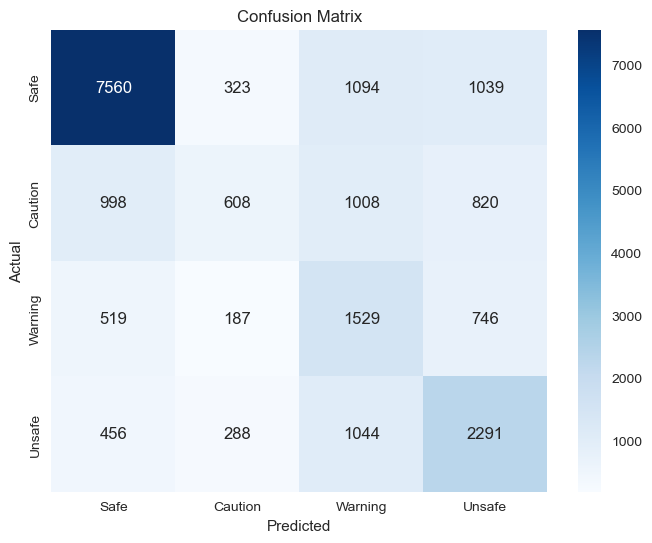

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have "Ecoli_Levels" and "pred_e" columns in your DataFrame
actual = res["Ecoli_Levels"]
predicted = res["pred_e"]

# Define the class labels
class_labels = ["Safe", "Caution", "Warning", "Unsafe"]

# Create the confusion matrix
confusion = confusion_matrix(actual, predicted, labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [94]:
## Get the total number of observations in each class
level_counts = res['Ecoli_Levels'].value_counts()
print ('\nN observation in each class:')
print (level_counts)

level_counts2 = res['pred_e'].value_counts()
print ('\nN observation in each class:')
print (level_counts2)


N observation in each class:
Safe       10016
Unsafe      4079
Caution     3434
Warning     2981
Name: Ecoli_Levels, dtype: int64

N observation in each class:
Safe       9533
Unsafe     4896
Warning    4675
Caution    1406
Name: pred_e, dtype: int64


In [96]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each level
accuracy_by_level = {}
for label in class_labels:
    true_positives = confusion[class_labels.index(label), class_labels.index(label)]
    total_predictions = sum(confusion[class_labels.index(label)])
    accuracy = true_positives / total_predictions
    accuracy_by_level[label] = accuracy
    print(f"Accuracy for {label}: {accuracy:.2f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(actual, predicted)
print(f"Overall Accuracy: {overall_accuracy:.2f}")


Accuracy for Safe: 0.75
Accuracy for Caution: 0.18
Accuracy for Warning: 0.51
Accuracy for Unsafe: 0.56
Overall Accuracy: 0.58


In [35]:
clas_exp.evaluate_model(ecoli_l1_lightgbm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…